# Классификация грибов на съедобные и несъедобные
Этот датасет включает описания гипотетических образцов, соответствующих 23 видам грибов из семейства Шампиньоновых. На основании 22 физических характеристик грибы разделяются на два класса: съедобные и несъедобные (определенно ядовитые или неопределенной съедобности и не рекомендуемые к употреблению).
Рассмотрим каждый признак:
1. форма шляпки (cap-shape): bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. поферхность шляпки (cap-surface): fibrous=f,grooves=g,scaly=y,smooth=s
3. цвет шляпки (cap-color): brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. синяки (bruises): bruises=t,no=f
5. запах (odor): almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. Форма гимениальной пластики/ламелы (gill-attachment): attached=a,descending=d,free=f,notched=n
7. Размещение гимениальной пластики/ламелы (gill-spacing): close=c,crowded=w,distant=d
8. Размер гимениальной пластики/ламелы (gill-size): broad=b,narrow=n
9. Цвет гимениальной пластики/ламелы (gill-color): black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. Форма стебля (stalk-shape): enlarging=e,tapering=t
11. Корень стебля (stalk-root): bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. Поверхность стебля над кольцом (stalk-surface-above-ring): fibrous=f,scaly=y,silky=k,smooth=s
13. Поверхность стебля под кольцом (stalk-surface-below-ring): fibrous=f,scaly=y,silky=k,smooth=s
14. Цвет стебля над кольцом (stalk-color-above-ring): brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. Цвет стебля под кольцом (stalk-color-below-ring): brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. Тип вуали (veil-type): partial=p,universal=u
17. Цвет вуали (veil-color): brown=n,orange=o,white=w,yellow=y
18. Количество колец (ring-number): none=n,one=o,two=t
19. Тип колец (ring-type): cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. Цвет спор (spore-print-color): black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. Тип популяции (population): abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. Среда обитания (habitat): grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## 1. Чтение данных

In [5]:
from sklearn.datasets import fetch_openml

dataset = fetch_openml('mushroom', as_frame=True, return_X_y=True)
X, Y = dataset[0], dataset[1]
X.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [2]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Тип вуали имеет только одно уникальное значение, имеет смысл удалить этот столбец

In [3]:
X = X.drop(columns=['veil-type'], axis=1)

Пропущенные значения наблюдается только в столбце "корень стебля"

## Обработка категориальных признаков
Все признаки являются категориальными, используем LabelEncoder чтобы преобразовать категориальные признаки к количественным. Также LabelEncoder поможет убрать пропущенные значения.


In [16]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
XY_merged = pd.concat([X, Y], axis = 1)
for column in XY_merged.columns:
    XY_merged[column] = labelencoder.fit_transform(XY_merged[column])
X=XY_merged.drop(['class'], axis=1)
Y=XY_merged['class']
X.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


## Разбиение на обучающую и тестовую выборки
Для тестовой выборки использую 20% от всего датасета


In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size = 0.2)

## Обучаем классификатор 

In [26]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (100,100),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)


In [27]:
%%time
mlp_model.fit(x_train, y_train)

CPU times: user 22 s, sys: 730 ms, total: 22.8 s
Wall time: 5.7 s


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              random_state=42, solver='lbfgs')

## Проверим качество классификатора

In [29]:
from sklearn.metrics import accuracy_score

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)
print("train accuracy ", accuracy_score(y_train, y_train_pred))
print("test accuracy ", accuracy_score(y_test, y_test_pred))

train accuracy  1.0
test accuracy  0.9981538461538462


## Построим графики зависимости ошибки от параметра alpha

/home/vnazarov/miniconda3/envs/ml_hw/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


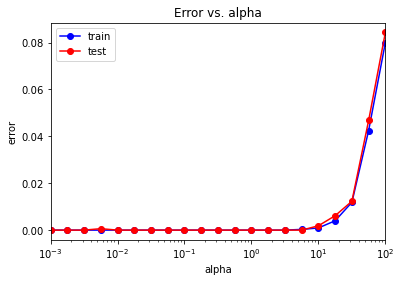

In [32]:
import numpy as np
import matplotlib.pyplot as plt
alpha_arr = np.logspace(-3, 2, 21)

test_err = []
train_err = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(1 - accuracy_score(y_train, y_train_pred))
    test_err.append(1 - accuracy_score(y_test, y_test_pred))

plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

In [34]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Min train error: ", min_train_err, " min test error ", min_test_err)
alpha_opt = alpha_arr[test_err == min_test_err]
print("Optimal alhpa ", alpha_opt)

Min train error:  0.0  min test error  0.0
Optimal alhpa  [1.00000000e-03 1.77827941e-03 3.16227766e-03 1.00000000e-02
 1.77827941e-02 3.16227766e-02 5.62341325e-02 1.00000000e-01
 1.77827941e-01 3.16227766e-01 5.62341325e-01 1.00000000e+00
 1.77827941e+00 3.16227766e+00 5.62341325e+00]


## Построим графики зависимости ошибки от количества нейронов

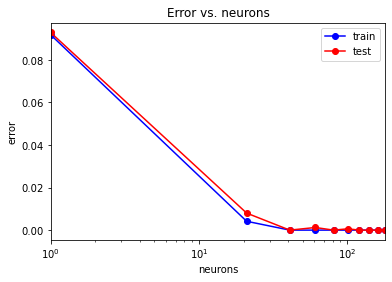

In [56]:
import numpy as np
import matplotlib.pyplot as plt
neurons_count = np.array([x for x in range(1, 200, 20)])

test_err = []
train_err = []

for neurons in neurons_count:
    mlp_model = MLPClassifier(alpha = alpha_opt[0], hidden_layer_sizes = (neurons,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(1 - accuracy_score(y_train, y_train_pred))
    test_err.append(1 - accuracy_score(y_test, y_test_pred))

plt.semilogx(neurons_count, train_err, 'b-o', label = 'train')
plt.semilogx(neurons_count, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neurons_count), np.max(neurons_count)])
plt.title('Error vs. neurons')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()

In [58]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Min train error: ", min_train_err, " min test error ", min_test_err)

neurons_opt = neurons_count[test_err == min_test_err]
print("Optimal neurons ", neurons_opt)

Min train error:  0.0  min test error  0.0
Optimal neurons  [ 41  81 121 141 161 181]


## Заключение
В результате работы была обучена полносвязная нейронная сеть на задаче классификации грибов по их физическим свойствам на съедобные и не съедобные. Данные были разделены на тестовую и обучающую выборки и были подобраны наиболее подходящие гиперпараметры alpha и количество нейронов. Получившаяся точность равна 100% на тренировочной и тестовой выборках. Данная точность достигнута благодаря тому, что грибы почти всегда однозначно можно классифицировать на съедобные и несъедобные только по одному признаку "запах". Необходимо только классифицировать грибы без запаха.